In [1]:
import numpy as np
import pandas as pd
from localfunction import *
from tqdm import trange
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.lines import Line2D

In [2]:
# input function for plotting
def makeinput(depth,vp):
    depth2 = depth + depth
    depth2.sort()
    depth2.remove(min(depth2))
    depth2.append(max(depth2)+50)

    vp2 = vp + vp
    vp2.sort()
    return(depth2,vp2)


In [3]:
path = "G:\\My Drive\\Tomography\\220523\\velmod\\"

In [12]:
naming_list = ["Velest input", "Velest result", "AK135f", "Widiyantoro et al. (1997)", "Rahman et al. (2022)", "Proposed"]

Text(0, 0.5, 'Depth (km)')

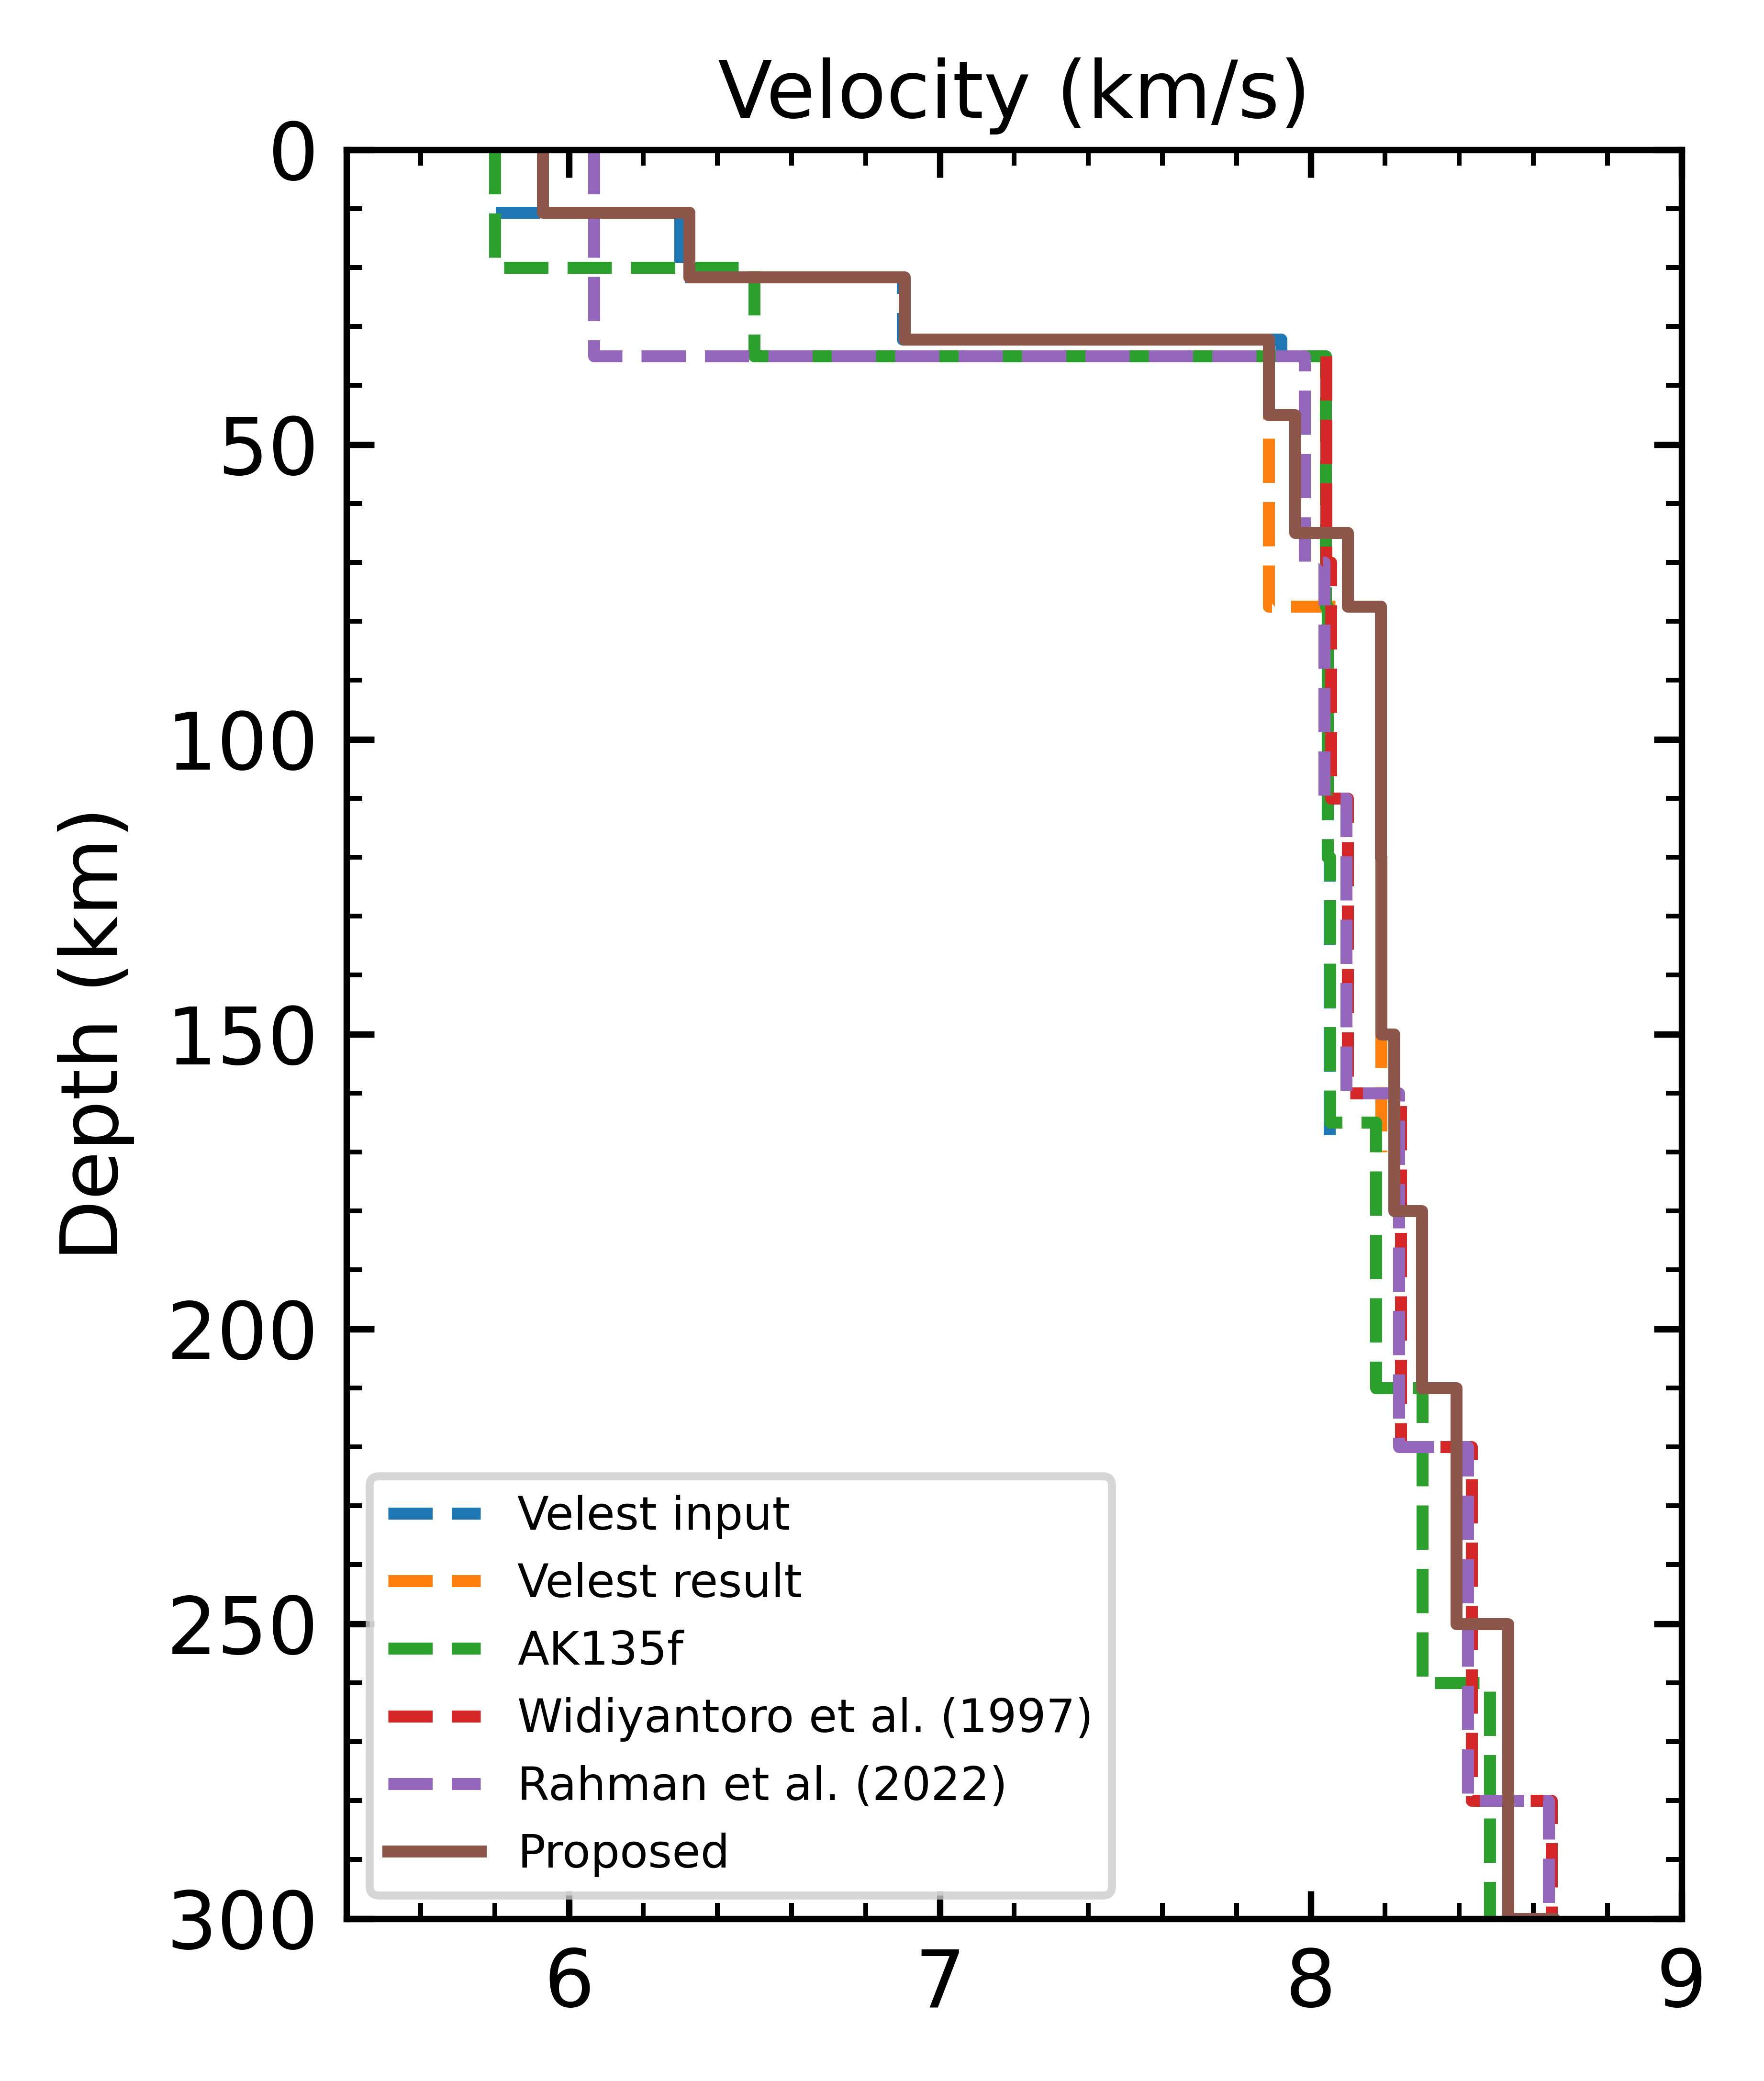

In [19]:
fig,ax = plt.subplots(figsize=(3,4), dpi = 1200)
for i in range(6):
    df = pd.read_csv(path+f"{i}.csv", delimiter=';')
    depth = df['depth'].astype('float').to_list()
    vp = df.iloc[:,1].values.transpose().tolist()
    depth2,vp2 = makeinput(depth,vp)
    if i >= 0:
        if i==5:
            ax.plot(vp2,depth2, label=naming_list[i])
        else:
            ax.plot(vp2,depth2, label=naming_list[i], linestyle='--')

ax.legend(fontsize="xx-small")
#image parameter
ax.set_xlim([5.4,9])
ax.set_ylim([0,300])
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_label_position('top') 
ax.xaxis.set_tick_params(top=True, direction='in',which = 'both')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_tick_params(right=True, direction='in', which = 'both')
ax.invert_yaxis()
# ax.set_title('1-D Model')
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Depth (km)')

In [20]:
fig.savefig(path+"\\Vp_velocity_model.png", dpi=1200)